<a href="https://colab.research.google.com/github/zeeshanali786/AI-ML/blob/main/recovery_usr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

Synthatic data creation as we cant use prod data for security reasons

In [2]:
# prompt: load that file and also I want to see some record

import pandas as pd
import os

# Assuming the file is in the current working directory
file_path = '/content/recovery/recovery.xlsx'
data = pd.read_excel(file_path)

data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/recovery/recovery.xlsx'

In [67]:
# Replace NaN values in 'phonenumber' with a binary indicator (1 for present, 0 for absent)
#data['has_phone'] = np.where(data['EXT_PHONENUMBER'].isna(), 0, 1)

# You can now drop the original 'phonenumber' column if needed
#data = data.drop('EXT_PHONENUMBER', axis=1)



In [76]:
data['has_insured-company'] = np.where(data['EXT_INSUREDCOMPANY'].isna(), 0, 1)

# You can now drop the original 'phonenumber' column if needed
data = data.drop('EXT_INSUREDCOMPANY', axis=1)



In [77]:
# Display the updated DataFrame to verify the changes
data.head()

,LICENSESTATE,MAKE,EXT_INSURANCELINETYPE,EXT_INSUREDTYPE,EXT_DEMANDTYPE,EXT_DEMANDSTATUSTYPE,EXT_PHONENUMBER,EXT_TOTALDAMAGEAMT,EXT_GROSSSETTLEMENTAMT,EXT_VENDORNAME,CREATETIME,EXT_DEMANDAUTODAMAGETYPE,has_insured-company
0,10018.0,CHRY,10001,10002,10001,10017,1,11122.88,0.0,ABC,07-MAR-24 05.27.51.423000000 PM,NaN,0
1,10007.0,SUBARU,10001,10002,10001,10018,0,2465.19,50.0,ABC,02-OCT-24 09.00.52.021000000 AM,10001.0,0
2,10013.0,NISSAN,10001,10002,10001,10018,1,2072.04,52.0,ABC,28-JUN-24 10.00.18.004000000 AM,NaN,0
3,10059.0,TOYOTA,10001,10002,10001,10018,0,4105.53,53.0,ABC,18-JUL-24 12.59.50.002000000 PM,10001.0,0
4,10026.0,VOLKS,10001,10002,10001,10018,1,1267.69,68.0,ABC,16-JUL-24 08.42.45.595000000 AM,10001.0,0


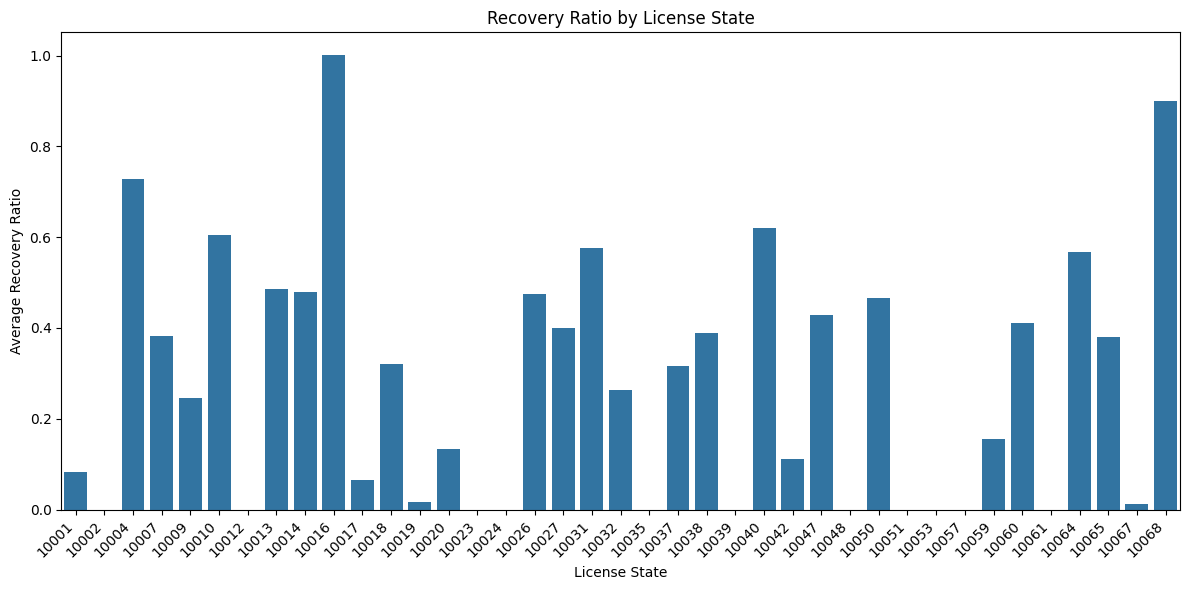

In [70]:
# prompt: I need to see the chart for ratio of recovery and licenstate using  settlement amount as recovered amount from total amount to recover  EXT_TOTALDAMAGEAMT   license states

# Calculate the recovery ratio
data['recovery_ratio'] = data['EXT_GROSSSETTLEMENTAMT'] / data['EXT_TOTALDAMAGEAMT']

# Group by license state and calculate the mean recovery ratio
recovery_by_state = data.groupby('LICENSESTATE')['recovery_ratio'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='LICENSESTATE', y='recovery_ratio', data=recovery_by_state)
plt.xlabel('License State')
plt.ylabel('Average Recovery Ratio')
plt.title('Recovery Ratio by License State')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [73]:
# prompt: remove ratio column, I eman for  data['recovery_ratio']  only

data = data.drop('recovery_ratio', axis=1)

In [78]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
LICENSESTATE,310.0,10027.261290,20.266017,10001.00,10009.25,10018.0,10042.000,10068.00
EXT_INSURANCELINETYPE,399.0,10001.000000,0.000000,10001.00,10001.00,10001.0,10001.000,10001.00
EXT_INSUREDTYPE,399.0,10001.994987,0.070710,10001.00,10002.00,10002.0,10002.000,10002.00
EXT_DEMANDTYPE,399.0,10001.000000,0.000000,10001.00,10001.00,10001.0,10001.000,10001.00
EXT_DEMANDSTATUSTYPE,399.0,10016.832080,2.480957,10010.00,10017.00,10018.0,10018.000,10018.00
EXT_PHONENUMBER,399.0,0.716792,0.451122,0.00,0.00,1.0,1.000,1.00
EXT_TOTALDAMAGEAMT,399.0,12379.906892,14570.814757,339.63,4108.02,8500.0,14612.375,163337.34
EXT_GROSSSETTLEMENTAMT,121.0,2335.776364,2733.479146,0.00,250.00,1350.0,3334.000,12148.00
EXT_DEMANDAUTODAMAGETYPE,312.0,10001.000000,0.000000,10001.00,10001.00,10001.0,10001.000,10001.00
has_insured-company,399.0,0.005013,0.070710,0.00,0.00,0.0,0.000,1.00


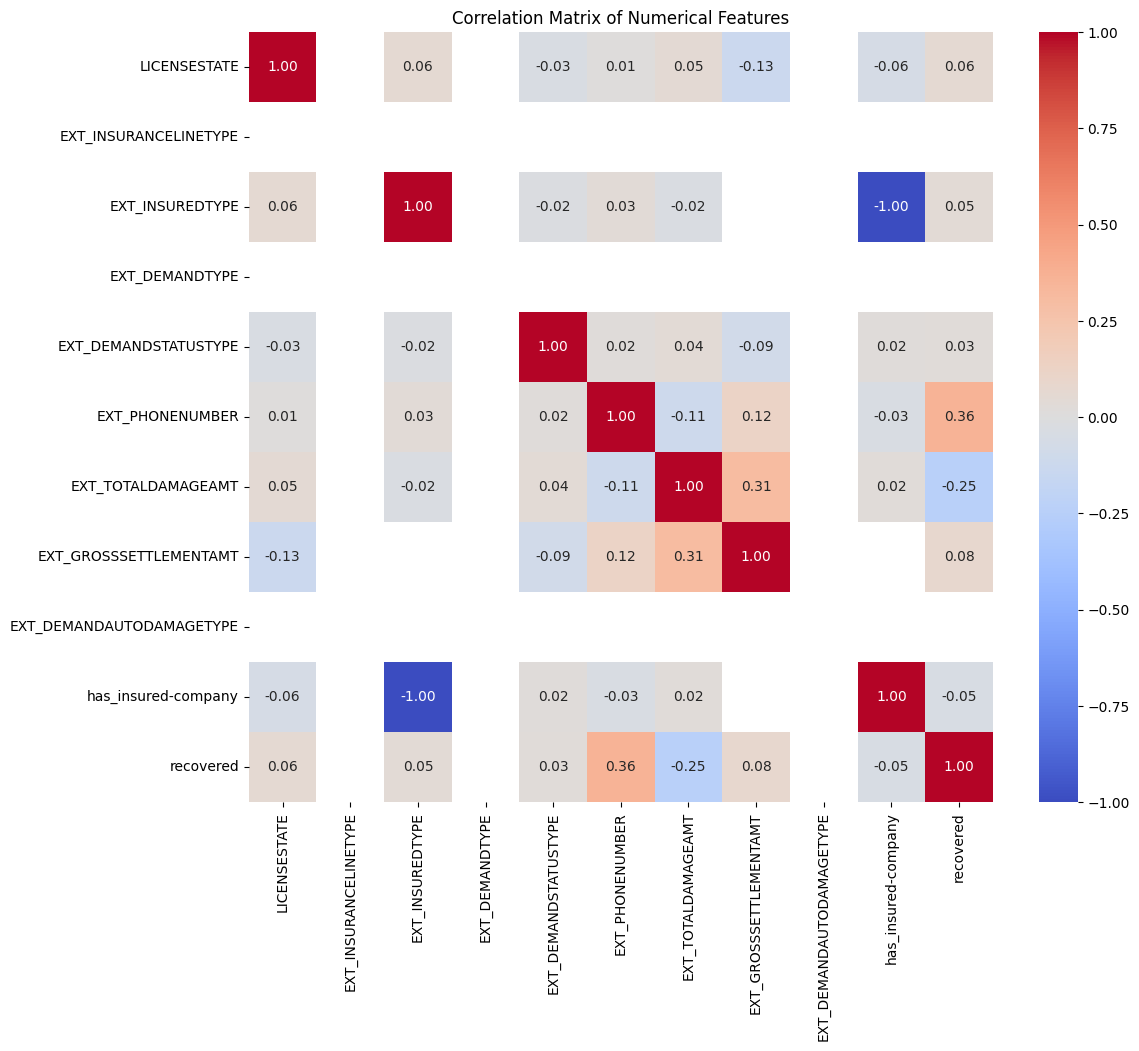

In [95]:


# Select numerical features for correlation analysis
numerical_features = data.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

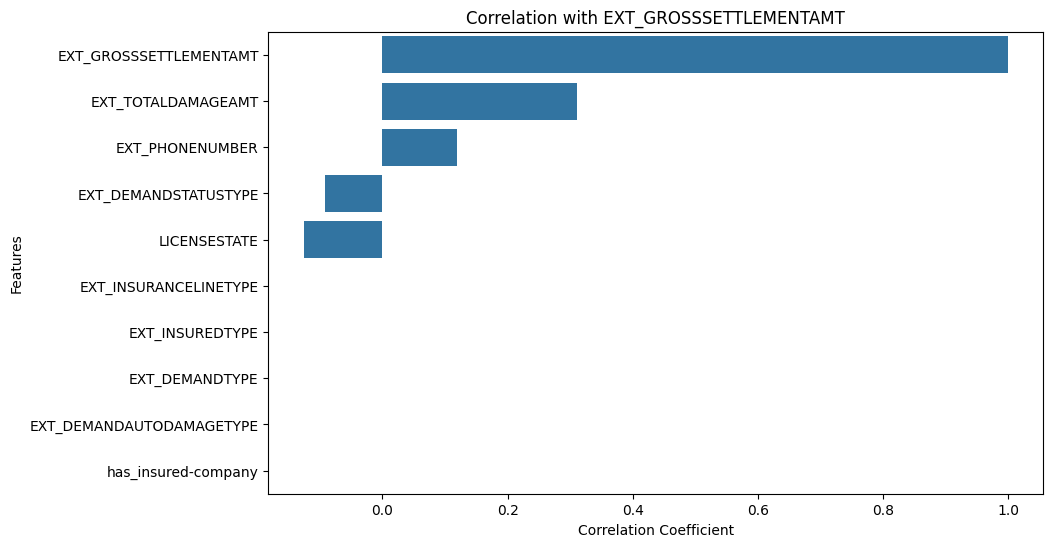

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# prompt: i want to see the correlation of all field with EXT_GROSSSETTLEMENTAMT

# Calculate the correlation of all fields with 'EXT_GROSSSETTLEMENTAMT'
# Select only numerical features for correlation analysis
numerical_features = data.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for numerical features only
correlation_with_target = data[numerical_features].corr()['EXT_GROSSSETTLEMENTAMT'].sort_values(ascending=False)

# Visualization using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index)
plt.title('Correlation with EXT_GROSSSETTLEMENTAMT')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

Build and Train a model to predict the Gross settlement

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
#Select features and target variable:
X = data[['EXT_PHONENUMBER', 'LICENSESTATE', 'EXT_DEMANDSTATUSTYPE','EXT_TOTALDAMAGEAMT' ]]  # Features
y = data['EXT_GROSSSETTLEMENTAMT']  # Target variable
# Replace NaN values in the target variable (y) with 0
y = y.fillna(0)
# Replace NaN values in X with 0
X = X.fillna(0)

split in training and test sets

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% for training, 20% for testing

In [90]:
#Create and train a Linear Regression model:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred = model.predict(X_test)

Evaluate the model using metrics like Mean Squared Error (MSE) and R-squared:

In [92]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3338130.3507893127
R-squared: 0.09139725723596803


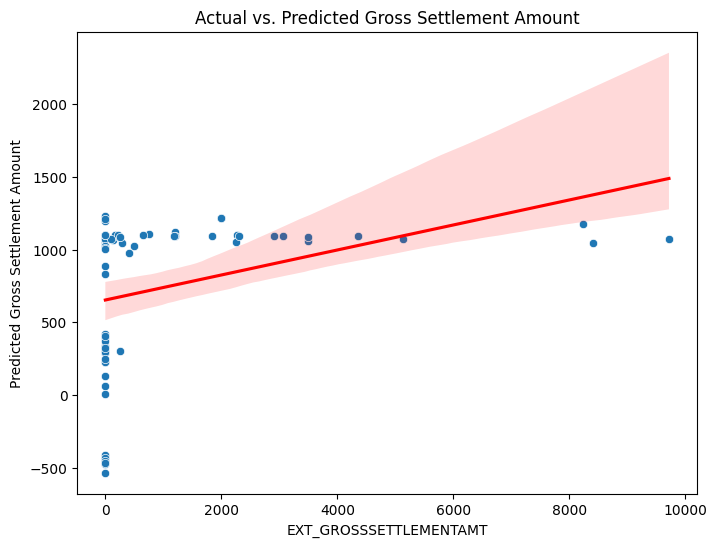

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained your model and obtained y_pred (predicted values) and y_test (actual values)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Gross Settlement Amount")
plt.ylabel("Predicted Gross Settlement Amount")
plt.title("Actual vs. Predicted Gross Settlement Amount")

# Add a regression line (line of best fit)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')  # scatter=False to avoid plotting points again

plt.show()

make classification problem

In [99]:
#Create a new binary target variable indicating recovery status:

data['recovered'] = np.where(data['EXT_GROSSSETTLEMENTAMT'] > 0, 1, 0)

In [104]:
#2. Select features and target:
X = data[['EXT_PHONENUMBER', 'LICENSESTATE', 'EXT_DEMANDSTATUSTYPE']]  # Features
y = data['recovered']  # Target variable
# Replace NaN values in the target variable (y) with 0
y = y.fillna(0)
# Replace NaN values in X with 0
X = X.fillna(0)

In [105]:
#Choose a classification model:

#Logistic Regression: A good starting point for binary classification problems.

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [106]:
#Split the data into training and testing sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Use code with caution
#Train the model:

model.fit(X_train, y_train)

LogisticRegression()

In [108]:
y_pred = model.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-score: {f1_score(y_test, y_pred)}")

Accuracy: 0.625
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


confusion matric

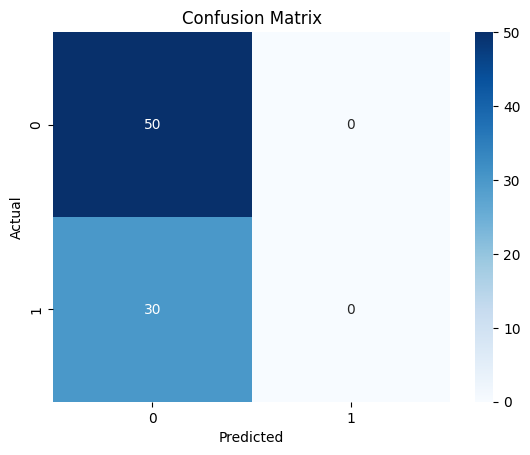

In [110]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

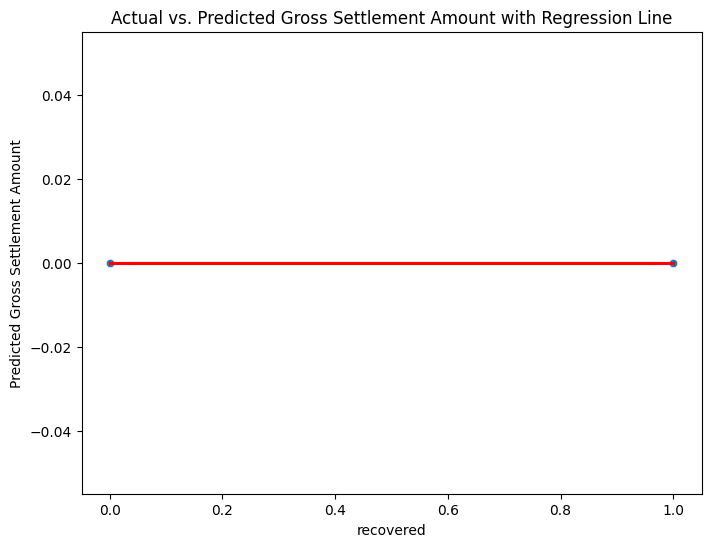

In [111]:
# prompt: give me a regression line

# The regression line is already plotted in the provided code.
# This code snippet just adds labels and title for clarity.

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Gross Settlement Amount")
plt.ylabel("Predicted Gross Settlement Amount")
plt.title("Actual vs. Predicted Gross Settlement Amount with Regression Line")

# Add a regression line (line of best fit)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')

plt.show()

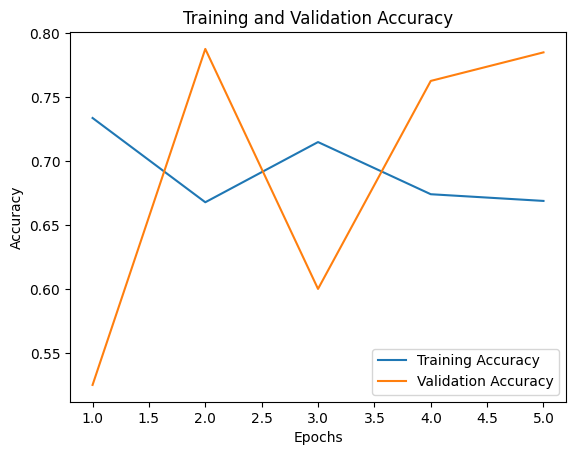

In [112]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming you have your data in X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression(class_weight='balanced')

# Use cross-validation for training and validation
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, X, y, cv=5, return_train_score=True)

# Get the training and validation accuracy scores from the cv_results
train_accuracy = cv_results['train_score']
val_accuracy = cv_results['test_score']

# Plot the training and validation accuracy
epochs = range(1, len(train_accuracy) + 1)  # Assuming you want to plot against epochs

plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [113]:
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ... (your code for data preparation and feature selection) ...

# Assuming X and y are your features and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-score: {f1_score(y_test, y_pred)}")

# ... (rest of your code for further analysis or visualization) ...

Accuracy: 0.775
Precision: 0.65
Recall: 0.8666666666666667
F1-score: 0.7428571428571429


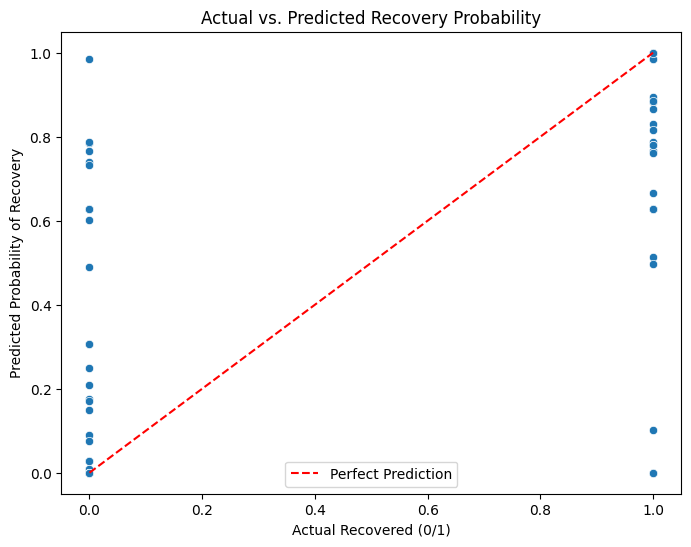

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (your code for training the Random Forest model) ...

# Get predicted probabilities for the positive class (class 1)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Convert probabilities to class predictions using a threshold (e.g., 0.5)
y_pred_class = (y_pred_prob >= 0.5).astype(int)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_prob)  # Use probabilities for y-axis
plt.xlabel("Actual Recovered (0/1)")
plt.ylabel("Predicted Probability of Recovery")
plt.title("Actual vs. Predicted Recovery Probability")

# Add a line representing perfect prediction (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Perfect Prediction')

plt.legend()
plt.show()

In [ ]:
# prompt: plot the training and validation accuracy

import matplotlib.pyplot as plt

# Assuming you have already trained your model and obtained cv_results

# Get the training and validation accuracy scores from the cv_results
train_accuracy = cv_results['train_score']
val_accuracy = cv_results['test_score']

# Plot the training and validation accuracy
epochs = range(1, len(train_accuracy) + 1)  # Assuming you want to plot against epochs

plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()